# Logistic Regression - Team A

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Getting the data
#### It is a cleaned dataset prepared for Model Building
The Data set used here is prepared for our ML models. It is prepared using the following steps:
1. First we took the dataset obtained after the initial EDA & cleaning.
2. Even though most of the null values had been already removed, there were still few left. 
3. We took the subset of the dataset by dropping all the data obtained before 2009 due to so many missing values in some variables.
4. Then, we removed the remaining null values also then dropped all the date columns and some unnecessary columns.
5. finally we are left with 50 variables which we can se below.
6. Also, converted the variable 'IncomeRange' into ordinal categorical form.
7. Changed all boolean variables into integer type.
8. Finally we converted the Target variable 'LoanStatus' into two categories '1' and '0'. Where ***1 = Accepted*** and ***0 = High Risk*** .

(where *Accepted = 'Current', 'Completed' and 'FinalPaymentInProgress'* and *High Risk = Remaining values*)

In [2]:
#loading the dataset
data = pd.read_csv('updated_data.csv')
pd.set_option('display.max_columns', None)
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,1,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,2,CO,Professional,Employed,44.0,0,0,680.0,699.0,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",1,6125.000000,0,10000,Q1 2014,318.93,1.0,0,0,0.0,1
1,36,1,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,16,GA,Skilled Labor,Employed,113.0,1,0,800.0,819.0,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",1,2875.000000,16,10000,Q4 2012,321.45,1.0,0,0,0.0,158
2,36,1,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,2,MN,Executive,Employed,44.0,1,0,680.0,699.0,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",1,9583.333333,6,15000,Q3 2013,563.97,1.0,0,0,0.0,20
3,60,1,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,10.0,1,NM,Professional,Employed,82.0,1,0,740.0,759.0,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",1,8333.333333,3,15000,Q4 2013,342.37,1.0,0,0,0.0,1
4,36,1,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,2.0,1,KS,Sales - Retail,Employed,172.0,0,0,680.0,699.0,10.0,7.0,20.0,6,214.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5812.0,0.72,1929.0,16.0,0.68,0.0,0.27,"$25,000-49,999",1,2083.333333,11,3000,Q2 2013,122.67,1.0,0,0,0.0,1


In [3]:
data.shape

(84853, 50)

### Variable selection
After our multiple analyses we decided to choose these variables

In [36]:
df = data[['IncomeRange','ProsperScore', 'BorrowerRate', 'BorrowerAPR', 'Occupation', 
           'DebtToIncomeRatio', 'BankcardUtilization','Investors','Term', 'DelinquenciesLast7Years',
           'MonthlyLoanPayment', 'LoanOriginalAmount', 'ProsperRating (numeric)', 'LenderYield', 'EstimatedEffectiveYield',
           'EstimatedLoss', 'EstimatedReturn', 'EmploymentStatus', 'EmploymentStatusDuration', 'TotalCreditLinespast7years',
           'OpenRevolvingMonthlyPayment', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'TotalTrades',
           'StatedMonthlyIncome', 'LoanMonthsSinceOrigination', 'LoanOriginationQuarter', 
           'LoanStatus' ]]

### Label Encoding
Performing Label Encoding in categorical variables to convert them into numerical form.

In [37]:
#Importing the LabelEncoder module
from sklearn.preprocessing import LabelEncoder

In [38]:
# Lebel Encoding the variables
LE = LabelEncoder()
df['IncomeRange'] = LE.fit_transform(df['IncomeRange'])

# one hot encoding
# Listing the columns with object datatype
col = df.dtypes[df.dtypes == 'object'].index
print(col)
df_num = pd.get_dummies(data=df, columns=col, drop_first=True)
df = df_num

Index(['Occupation', 'EmploymentStatus', 'LoanOriginationQuarter'], dtype='object')


In [39]:
df.head()

,IncomeRange,ProsperScore,BorrowerRate,BorrowerAPR,DebtToIncomeRatio,BankcardUtilization,Investors,Term,DelinquenciesLast7Years,MonthlyLoanPayment,LoanOriginalAmount,ProsperRating (numeric),LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,EmploymentStatusDuration,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,AvailableBankcardCredit,TotalTrades,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanStatus,Occupation_Administrative Assistant,Occupation_Analyst,Occupation_Architect,Occupation_Attorney,Occupation_Biologist,Occupation_Bus Driver,Occupation_Car Dealer,Occupation_Chemist,Occupation_Civil Service,Occupation_Clergy,Occupation_Clerical,Occupation_Computer Programmer,Occupation_Construction,Occupation_Dentist,Occupation_Doctor,Occupation_Engineer - Chemical,Occupation_Engineer - Electrical,Occupation_Engineer - Mechanical,Occupation_Executive,Occupation_Fireman,Occupation_Flight Attendant,Occupation_Food Service,Occupation_Food Service Management,Occupation_Homemaker,Occupation_Investor,Occupation_Judge,Occupation_Laborer,Occupation_Landscaping,Occupation_Medical Technician,Occupation_Military Enlisted,Occupation_Military Officer,Occupation_Nurse (LPN),Occupation_Nurse (RN),Occupation_Nurse's Aide,Occupation_Other,Occupation_Pharmacist,Occupation_Pilot - Private/Commercial,Occupation_Police Officer/Correction Officer,Occupation_Postal Service,Occupation_Principal,Occupation_Professional,Occupation_Professor,Occupation_Psychologist,Occupation_Realtor,Occupation_Religious,Occupation_Retail Management,Occupation_Sales - Commission,Occupation_Sales - Retail,Occupation_Scientist,Occupation_Skilled Labor,Occupation_Social Worker,Occupation_Student - College Freshman,Occupation_Student - College Graduate Student,Occupation_Student - College Junior,Occupation_Student - College Senior,Occupation_Student - College Sophomore,Occupation_Student - Community College,Occupation_Student - Technical School,Occupation_Teacher,Occupation_Teacher's Aide,Occupation_Tradesman - Carpenter,Occupation_Tradesman - Electrician,Occupation_Tradesman - Mechanic,Occupation_Tradesman - Plumber,Occupation_Truck Driver,Occupation_Unknown,Occupation_Waiter/Waitress,EmploymentStatus_Full-time,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,LoanOriginationQuarter_Q1 2011,LoanOriginationQuarter_Q1 2012,LoanOriginationQuarter_Q1 2013,LoanOriginationQuarter_Q1 2014,LoanOriginationQuarter_Q2 2010,LoanOriginationQuarter_Q2 2011,LoanOriginationQuarter_Q2 2012,LoanOriginationQuarter_Q2 2013,LoanOriginationQuarter_Q3 2009,LoanOriginationQuarter_Q3 2010,LoanOriginationQuarter_Q3 2011,LoanOriginationQuarter_Q3 2012,LoanOriginationQuarter_Q3 2013,LoanOriginationQuarter_Q4 2009,LoanOriginationQuarter_Q4 2010,LoanOriginationQuarter_Q4 2011,LoanOriginationQuarter_Q4 2012,LoanOriginationQuarter_Q4 2013
0,4,7.0,0.0920,0.12016,0.18,0.21,1,36,0.0,318.93,10000,6.0,0.0820,0.07960,0.0249,0.05470,44.0,29.0,389.0,3989.0,10266.0,29.0,6125.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,9.0,0.0974,0.12528,0.15,0.04,158,36,14.0,321.45,10000,6.0,0.0874,0.08490,0.0249,0.06000,113.0,29.0,115.0,1444.0,30754.0,26.0,2875.000000,16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,4.0,0.2085,0.24614,0.26,0.81,20,36,0.0,563.97,15000,3.0,0.1985,0.18316,0.0925,0.09066,44.0,49.0,220.0,6193.0,695.0,39.0,9583.333333,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2,10.0,0.1314,0.15425,0.36,0.39,1,60,0.0,342.37,15000,5.0,0.1214,0.11567,0.0449,0.07

### Defining functions 
Below are some functions which we are going to use further in our model

- Function to plot Confusion matrix

In [8]:
#Importing classification_report and confusion_matrix functions
from sklearn.metrics import classification_report, confusion_matrix  
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


- Function to show Mutual Information (MI) score

In [9]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


- Function to plot ROC curve

In [10]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

# Model Building process

# Trial 1
In the first trial we are going to use the variables directly without any normalization or feature engineering technique.

### Seperating Dependent and Independent variables

In [40]:
#Dependent variable
y = df['LoanStatus']    # np.asarray

In [41]:
#Independent variable
X = df.drop(['LoanStatus'], axis=1)               #np.asarray

### Train / Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (67882, 115) (67882,)
Test set: (16971, 115) (16971,)


## Model Building

In [15]:
from sklearn.linear_model import LogisticRegression     #Library function for Logistic Regression from sklearn package
from sklearn.metrics import confusion_matrix            #Library function for Confusion matrix from sklearn package
LR = LogisticRegression( solver='liblinear').fit(X_train,y_train)
LR                  #Here LR is LogisticRegression model

LogisticRegression(solver='liblinear')

### Results
***Confusion Matrix***

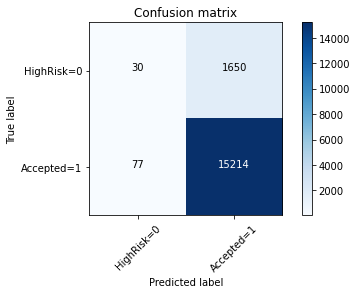

In [16]:
# Making the Confusion Matrix with default threshhold

y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=['HighRisk=0', 'Accepted=1'],normalize= False,  title='Confusion matrix')

***Accuracy Score***

In [17]:
from sklearn.metrics import accuracy_score
print(f'Trial 1 Accuracy: {accuracy_score(y_test, y_pred)}')

Trial 1 Accuracy: 0.8982381709975841


***F1 Score***

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='weighted')

0.8559394967753473

***AUC score***

In [20]:
from sklearn.metrics import  roc_auc_score, roc_curve
yhat_prob = LR.predict_proba(X_test)
print(f'Trial 1 AUC score: {roc_auc_score(y_test, yhat_prob[:,1])}')

Trial 1 AUC score: 0.7721430829214819


***ROC Curve***

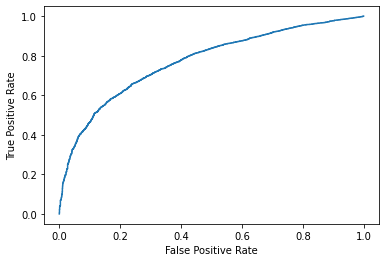

In [21]:
plot_roc_curve(y_test, yhat_prob[:,1])

# Trial 2
In Trial 2 we are going to try some feature engineering techniques to improve model quality.

### Clustering

In [23]:
# Create cluster feature
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,IncomeRange,ProsperScore,BorrowerRate,BorrowerAPR,DebtToIncomeRatio,BankcardUtilization,Investors,Term,DelinquenciesLast7Years,MonthlyLoanPayment,LoanOriginalAmount,ProsperRating (numeric),LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,EmploymentStatusDuration,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,RevolvingCreditBalance,AvailableBankcardCredit,TotalTrades,StatedMonthlyIncome,LoanMonthsSinceOrigination,Occupation_Administrative Assistant,Occupation_Analyst,Occupation_Architect,Occupation_Attorney,Occupation_Biologist,Occupation_Bus Driver,Occupation_Car Dealer,Occupation_Chemist,Occupation_Civil Service,Occupation_Clergy,Occupation_Clerical,Occupation_Computer Programmer,Occupation_Construction,Occupation_Dentist,Occupation_Doctor,Occupation_Engineer - Chemical,Occupation_Engineer - Electrical,Occupation_Engineer - Mechanical,Occupation_Executive,Occupation_Fireman,Occupation_Flight Attendant,Occupation_Food Service,Occupation_Food Service Management,Occupation_Homemaker,Occupation_Investor,Occupation_Judge,Occupation_Laborer,Occupation_Landscaping,Occupation_Medical Technician,Occupation_Military Enlisted,Occupation_Military Officer,Occupation_Nurse (LPN),Occupation_Nurse (RN),Occupation_Nurse's Aide,Occupation_Other,Occupation_Pharmacist,Occupation_Pilot - Private/Commercial,Occupation_Police Officer/Correction Officer,Occupation_Postal Service,Occupation_Principal,Occupation_Professional,Occupation_Professor,Occupation_Psychologist,Occupation_Realtor,Occupation_Religious,Occupation_Retail Management,Occupation_Sales - Commission,Occupation_Sales - Retail,Occupation_Scientist,Occupation_Skilled Labor,Occupation_Social Worker,Occupation_Student - College Freshman,Occupation_Student - College Graduate Student,Occupation_Student - College Junior,Occupation_Student - College Senior,Occupation_Student - College Sophomore,Occupation_Student - Community College,Occupation_Student - Technical School,Occupation_Teacher,Occupation_Teacher's Aide,Occupation_Tradesman - Carpenter,Occupation_Tradesman - Electrician,Occupation_Tradesman - Mechanic,Occupation_Tradesman - Plumber,Occupation_Truck Driver,Occupation_Unknown,Occupation_Waiter/Waitress,EmploymentStatus_Full-time,EmploymentStatus_Not employed,EmploymentStatus_Other,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,LoanOriginationQuarter_Q1 2011,LoanOriginationQuarter_Q1 2012,LoanOriginationQuarter_Q1 2013,LoanOriginationQuarter_Q1 2014,LoanOriginationQuarter_Q2 2010,LoanOriginationQuarter_Q2 2011,LoanOriginationQuarter_Q2 2012,LoanOriginationQuarter_Q2 2013,LoanOriginationQuarter_Q3 2009,LoanOriginationQuarter_Q3 2010,LoanOriginationQuarter_Q3 2011,LoanOriginationQuarter_Q3 2012,LoanOriginationQuarter_Q3 2013,LoanOriginationQuarter_Q4 2009,LoanOriginationQuarter_Q4 2010,LoanOriginationQuarter_Q4 2011,LoanOriginationQuarter_Q4 2012,LoanOriginationQuarter_Q4 2013,Cluster
0,4,7.0,0.0920,0.12016,0.18,0.21,1,36,0.0,318.93,10000,6.0,0.0820,0.07960,0.0249,0.05470,44.0,29.0,389.0,3989.0,10266.0,29.0,6125.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,9.0,0.0974,0.12528,0.15,0.04,158,36,14.0,321.45,10000,6.0,0.0874,0.08490,0.0249,0.06000,113.0,29.0,115.0,1444.0,30754.0,26.0,2875.000000,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
2,2,4.0,0.2085,0.24614,0.26,0.81,20,36,0.0,563.97,15000,3.0,0.1985,0.18316,0.0925,0.09066,44.0,49.0,220.0,6193.0,695.0,39.0,9583.333333,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,2,10.0,0.1314,0.15425,0.36,0.39,1,60,0.0,342.37,15000,5.0,0.1214,0.11567,0.0449,0.07077

### Scaling

In [42]:
from sklearn import preprocessing
X_scaled = preprocessing.StandardScaler().fit(X).transform(X)

### Principal Component Analysis (PCA)

In [43]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115
0,3.639791,-0.016343,-1.218062,-0.891188,-0.975626,0.499391,0.728450,-0.140099,0.952035,0.940732,-1.864290,0.727616,-0.285717,-1.012212,-0.277146,-1.187893,1.204800,-1.038866,-0.611565,-0.188987,-0.676934,0.297964,-0.483594,-0.251297,0.036306,0.142478,0.219941,0.015754,-0.154090,-0.111212,-0.088818,-0.059214,-0.036583,0.019852,-0.049901,-0.022062,0.089154,-0.041205,0.150437,0.069349,-0.133292,-0.017259,-0.139597,0.113253,0.025744,0.110100,0.077868,0.125995,0.000403,-0.032713,-0.162174,-0.033284,-0.194877,0.112321,-0.061566,0.003619,-0.133436,0.021322,-0.008543,-0.022354,0.036391,-0.048835,-0.016013,-0.006589,0.057383,0.006151,0.009483,-0.022090,-0.025058,0.063070,-0.103750,0.038936,-0.035046,0.228086,0.094071,0.023279,0.041137,-0.083953,0.117988,0.207980,-0.002516,-0.253260,-0.042041,0.121402,0.052517,-0.137529,0.177961,0.079147,-0.118968,0.625089,-0.155410,0.107728,0.525651,-0.115983,-0.245307,0.182933,-0.416727,0.081038,-0.090404,-0.689932,-0.462368,0.068568,-0.415643,0.044884,0.190114,0.001062,-0.262658,0.078215,-0.016991,-0.037766,-0.084735,-0.023681,0.015902,0.032729,0.000062
1,3.426007,-1.734298,-0.486540,0.411398,-0.835375,-1.211897,1.388765,0.331528,-0.378401,0.445108,0.404129,-0.991587,0.758204,0.890575,-0.936644,-0.078773,0.319098,-1.511873,2.222238,2.448363,1.451914,0.252651,-1.981902,0.816613,0.871032,-0.326796,0.945365,-0.076859,-0.590821,-0.315398,-0.765378,0.613430,-3.031784,-1.219066,-0.298497,2.335425,-1.633850,1.342540,-0.098071,1.054160,-1.623775,-0.075169,-0.413349,-0.076939,0.286399,-0.408308,0.370820,-0.265949,0.091346,0.150102,-0.353858,-0.196276,-0.201109,-0.090849,-0.351917,-0.176803,0.025925,0.101177,-0.118236,0.217045,-0.087628,-0.283593,0.029498,0.033543,0.028701,0.086045,-0.059996,-0.295601,-0.056712,-0.296883,-0.262537,-0.092104,0.118115,0.538125,0.359465,0.335171,-0.503092,0.032970,0.228711,-0.998891,0.290948,0.153724,0.186549,0.768369,-0.616418,0.776695,-0.180645,-0.028375,0.502362,-0.147222,0.871286,0.398753,-0.433956,-0.456879,0.813165,0.335897,0.314933,-0.130552,-0.370696,-0.016422,0.060368,-0.019747,0.295755,0.036021,0.045626,0.025694,-0.007853,-0.025280,-0.042593,-0.058156,-0.153894,-0.026653,0.020834,-0.000146,0.000128
2,-0.116426,2.385479,0.571702,0.439551,-0.051236,0.101715,0.435700,1.315382,-0.455277,-0.284377,-0.266626,2.383796,-0.481221,0.875317,0.068905,2.465089,-0.321084,0.134600,0.189209,-0.197154,0.329836,-0.277343,-0.285390,0.484980,0.630070,1.060729,-0.643671,-0.346578,-0.070076,-1.389136,-1.525438,-1.782149,-0.274003,-0.739148,-0.546578,-0.861078,0.372669,-0.441338,0.429242,-0.669624,-0.836149,0.024847,0.156709,0.204402,-0.348050,-0.195079,0.446645,0.100804,-0.051747,0.105922,0.441286,-0.280182,0.081815,0.142015,0.347839,-0.050162,-0.013441,0.114765,-0.004051,0.169363,0.092971,0.029592,-0.067300,0.078947,0.033794,0.014570,0.053973,-0.092989,0.086482,-0.133740,-0.074077,-0.252636,0.041491,-0.083487,-0.113591,0.015291,-0.274250,-0.035376,-0.296183,0.091252,-0.248341,-0.588931,-0.286178,0.360018,-0.061451,-0.267831,0.023635,0.385189,-0.079197,0.727313,1.643222,-0.906948,0.934098,-0.843374,-1.704626,0.421488,-0.486927,-0.750351,-0.597647,0.202826,0.089969,-0.014213,0.147162,0.019145,-0.468057,-0.071705,0.169871,-0.208309,-0.059676,0.085884,-0.222348,-0.051529,-0.001657,0.024776,0.000095
3,3.809948,2.881151,2.206540,-0.798226,0.270104,-0.224904,1.382081,0.170780,-0.675885,0.653692,1.995587,-0.172350,0.938459,-2

### Train/Test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split( X_pca, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (67882, 115) (67882,)
Test set: (16971, 115) (16971,)


### Model Building

In [45]:
from sklearn.linear_model import LogisticRegression     #Library function for Logistic Regression from sklearn package
from sklearn.metrics import confusion_matrix            #Library function for Confusion matrix from sklearn package
LR = LogisticRegression( solver='liblinear').fit(X_train,y_train)
LR                  #Here LR is LogisticRegression model

LogisticRegression(solver='liblinear')

### Results
***Confusion Matrix***

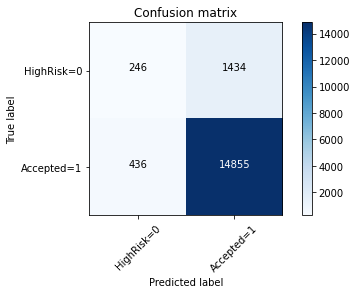

In [56]:
# Making the Confusion Matrix with default threshhold
y_pred = LR.predict(X_test)
y_prob = LR.predict_proba(X_test)
cm = confusion_matrix(y_test, y_prob[:,1]>0.65)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['HighRisk=0', 'Accepted=1'],normalize= False,  title='Confusion matrix')


***Accuracy Score***

In [47]:
print(f'Trial 2 Accuracy: {accuracy_score(y_test, y_pred)}')

Trial 2 Accuracy: 0.9008897531082435


***F1 Score***

In [48]:
f1_score(y_test, y_pred,average='weighted')

0.8557210342609122

***AUC score***

In [49]:
yhat_prob = LR.predict_proba(X_test)
print(f'Trial 2 AUC score: {roc_auc_score(y_test, yhat_prob[:,1])}')

Trial 2 AUC score: 0.8227293287990758


***ROC Curve***

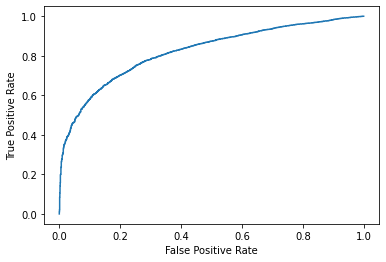

In [50]:
plot_roc_curve(y_test, yhat_prob[:,1])

## Final Result
### Trial 1
*Accuracy*: **0.8983** | *F1-Score*: **0.86** | *AUC-Score*: **0.7788**
### Trial 2
*Accuracy*: **0.9006** | *F1-Score*: **0.86** | *AUC-Score*: **0.8176**

## Conclusion

In Trial 1 we built the model by directly using our selected independent variables without any transformation and in Trial 2 we applied some feature engineering techniques. 
- From the above comparision between Trial 1 and Trial 2, we can say the our model is giving a good result, but applying feature engineering tecnnique has further improved our model's performance